In [44]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,RepeatedKFold,GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor, export_graphviz 
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay

## Predicting Delay Times on scheduled flights using airlines data

Question: Can we predict the delay times of scheduled flights for Delta Airlines, Southwest Airlines, and United Airlines?

Problem: We chose to research this question because flight delays are one of the worst feelings when you have to wait extra time at the airport. Flight delays also can cause financial losses, loss of reputation for the companies, and bad business relations for future business transactions for the airline companies. 

Which ML model is the best for predicting delay times?
    - Considering XG boost
    - Nueral Networks for an LSTM



In [45]:
southwest = pd.read_csv("/Users/anishyadlapalli/FlightPredictions/southwest.csv",encoding='unicode_escape', header=0)
southwest

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,WN,1/1/22,2644,N8578Q,ATL,5:55,6:02,115,97,7,6:13,11,0,0,0,0,0
1,WN,1/1/22,3245,NaN,MDW,16:35,0:00,135,0,0,0:00,0,0,0,0,0,0
2,WN,1/1/22,3438,N903WN,ATL,12:50,12:46,110,98,-4,12:59,13,0,0,0,0,0
3,WN,1/2/22,121,N494WN,MDW,18:45,21:14,135,175,149,21:25,11,17,0,40,0,132
4,WN,1/2/22,565,N8818Q,ATL,16:55,17:52,110,108,57,18:01,9,0,0,0,0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,WN,12/30/22,3394,N203WN,MDW,12:35,13:05,130,107,30,13:15,10,0,0,0,0,0
1460,WN,12/30/22,3813,N8639B,MDW,20:35,20:25,130,106,-10,20:34,9,0,0,0,0,0
1461,WN,12/31/22,901,N8573Z,MDW,12:45,14:14,125,110,89,14:25,11,0,0,0,0,74
1462,WN,12/31/22,986,N8719Q,ATL,17:55,18:15,110,102,20,18:31,16,0,0,0,0,0


In [46]:
delta_updated = pd.read_csv("/Users/anishyadlapalli/FlightPredictions/delta_updated.csv",encoding='unicode_escape', header=0)
delta_updated

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,DL,1/1/22,1675,N3750D,ATL,16:50,17:32,110,96,42,17:43,11,28,0,0,0,0
1,DL,1/1/22,2351,N828DN,ATL,13:00,13:00,108,104,0,13:21,21,0,0,0,0,0
2,DL,1/1/22,2532,N890DN,ATL,7:00,7:46,119,93,46,7:58,12,20,0,0,0,0
3,DL,1/1/22,2798,N883DN,ATL,10:00,9:52,100,95,-8,10:06,14,0,0,0,0,0
4,DL,1/2/22,1480,N3748Y,ATL,5:44,6:04,111,119,20,6:30,26,20,0,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2379,DL,12/30/22,2007,N390DA,ATL,19:30,19:22,116,100,-8,19:39,17,0,0,0,0,0
2380,DL,12/31/22,1266,N699DL,ATL,16:40,16:51,112,101,11,17:02,11,0,0,0,0,0
2381,DL,12/31/22,1406,N685DA,ATL,6:00,6:14,113,100,14,6:29,15,0,0,0,0,0
2382,DL,12/31/22,1469,N3749D,ATL,7:05,7:03,120,110,-2,7:20,17,0,0,0,0,0


In [47]:
united = pd.read_csv("/Users/anishyadlapalli/FlightPredictions/united.csv",encoding='unicode_escape', header=0)
united

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,UA,1/1/22,1643.0,N875UA,DEN,8:00,8:02,261.0,334.0,2.0,8:12,10.0,0.0,0.0,75.0,0.0,0.0
1,UA,1/1/22,1979.0,N892UA,DEN,15:50,16:30,260.0,266.0,40.0,16:41,11.0,15.0,0.0,6.0,0.0,25.0
2,UA,1/1/22,2234.0,N37287,ORD,6:45,6:36,139.0,149.0,-9.0,6:53,17.0,0.0,0.0,0.0,0.0,0.0
3,UA,1/2/22,1643.0,N848UA,DEN,8:00,9:00,261.0,260.0,60.0,9:17,17.0,0.0,59.0,0.0,0.0,0.0
4,UA,1/2/22,1979.0,N836UA,DEN,15:50,16:42,260.0,251.0,52.0,16:52,10.0,36.0,0.0,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,UA,12/31/22,319.0,N24729,IAH,6:00,5:59,209.0,205.0,-1.0,6:17,18.0,0.0,0.0,0.0,0.0,0.0
838,UA,12/31/22,343.0,N464UA,ORD,6:40,6:50,140.0,119.0,10.0,7:10,20.0,0.0,0.0,0.0,0.0,0.0
839,UA,12/31/22,1183.0,N804UA,DEN,15:52,16:46,258.0,239.0,54.0,17:07,21.0,10.0,0.0,0.0,0.0,25.0
840,UA,12/31/22,1643.0,N817UA,DEN,8:00,7:56,262.0,248.0,-4.0,8:14,18.0,0.0,0.0,0.0,0.0,0.0


In [48]:
#cleaning data drop Nan
southwest = southwest.dropna()
delta_updated = delta_updated.dropna()
united = united.dropna()

southwest


,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,WN,1/1/22,2644,N8578Q,ATL,5:55,6:02,115,97,7,6:13,11,0,0,0,0,0
2,WN,1/1/22,3438,N903WN,ATL,12:50,12:46,110,98,-4,12:59,13,0,0,0,0,0
3,WN,1/2/22,121,N494WN,MDW,18:45,21:14,135,175,149,21:25,11,17,0,40,0,132
4,WN,1/2/22,565,N8818Q,ATL,16:55,17:52,110,108,57,18:01,9,0,0,0,0,55
5,WN,1/2/22,988,N7838A,DEN,12:35,12:44,240,304,9,12:52,8,9,0,64,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,WN,12/30/22,3394,N203WN,MDW,12:35,13:05,130,107,30,13:15,10,0,0,0,0,0
1460,WN,12/30/22,3813,N8639B,MDW,20:35,20:25,130,106,-10,20:34,9,0,0,0,0,0
1461,WN,12/31/22,901,N8573Z,MDW,12:45,14:14,125,110,89,14:25,11,0,0,0,0,74
1462,WN,12/31/22,986,N8719Q,ATL,17:55,18:15,110,102,20,18:31,16,0,0,0,0,0


In [49]:
delta_updated


,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,DL,1/1/22,1675,N3750D,ATL,16:50,17:32,110,96,42,17:43,11,28,0,0,0,0
1,DL,1/1/22,2351,N828DN,ATL,13:00,13:00,108,104,0,13:21,21,0,0,0,0,0
2,DL,1/1/22,2532,N890DN,ATL,7:00,7:46,119,93,46,7:58,12,20,0,0,0,0
3,DL,1/1/22,2798,N883DN,ATL,10:00,9:52,100,95,-8,10:06,14,0,0,0,0,0
4,DL,1/2/22,1480,N3748Y,ATL,5:44,6:04,111,119,20,6:30,26,20,0,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2379,DL,12/30/22,2007,N390DA,ATL,19:30,19:22,116,100,-8,19:39,17,0,0,0,0,0
2380,DL,12/31/22,1266,N699DL,ATL,16:40,16:51,112,101,11,17:02,11,0,0,0,0,0
2381,DL,12/31/22,1406,N685DA,ATL,6:00,6:14,113,100,14,6:29,15,0,0,0,0,0
2382,DL,12/31/22,1469,N3749D,ATL,7:05,7:03,120,110,-2,7:20,17,0,0,0,0,0


In [50]:
united

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,UA,1/1/22,1643.0,N875UA,DEN,8:00,8:02,261.0,334.0,2.0,8:12,10.0,0.0,0.0,75.0,0.0,0.0
1,UA,1/1/22,1979.0,N892UA,DEN,15:50,16:30,260.0,266.0,40.0,16:41,11.0,15.0,0.0,6.0,0.0,25.0
2,UA,1/1/22,2234.0,N37287,ORD,6:45,6:36,139.0,149.0,-9.0,6:53,17.0,0.0,0.0,0.0,0.0,0.0
3,UA,1/2/22,1643.0,N848UA,DEN,8:00,9:00,261.0,260.0,60.0,9:17,17.0,0.0,59.0,0.0,0.0,0.0
4,UA,1/2/22,1979.0,N836UA,DEN,15:50,16:42,260.0,251.0,52.0,16:52,10.0,36.0,0.0,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,UA,12/30/22,1643.0,N852UA,DEN,8:00,8:00,262.0,232.0,0.0,8:11,11.0,0.0,0.0,0.0,0.0,0.0
837,UA,12/31/22,319.0,N24729,IAH,6:00,5:59,209.0,205.0,-1.0,6:17,18.0,0.0,0.0,0.0,0.0,0.0
838,UA,12/31/22,343.0,N464UA,ORD,6:40,6:50,140.0,119.0,10.0,7:10,20.0,0.0,0.0,0.0,0.0,0.0
839,UA,12/31/22,1183.0,N804UA,DEN,15:52,16:46,258.0,239.0,54.0,17:07,21.0,10.0,0.0,0.0,0.0,25.0


In [51]:
df_appended = pd.concat([southwest, delta_updated, united], ignore_index=True)
df_appended

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,WN,1/1/22,2644.0,N8578Q,ATL,5:55,6:02,115.0,97.0,7.0,6:13,11.0,0.0,0.0,0.0,0.0,0.0
1,WN,1/1/22,3438.0,N903WN,ATL,12:50,12:46,110.0,98.0,-4.0,12:59,13.0,0.0,0.0,0.0,0.0,0.0
2,WN,1/2/22,121.0,N494WN,MDW,18:45,21:14,135.0,175.0,149.0,21:25,11.0,17.0,0.0,40.0,0.0,132.0
3,WN,1/2/22,565.0,N8818Q,ATL,16:55,17:52,110.0,108.0,57.0,18:01,9.0,0.0,0.0,0.0,0.0,55.0
4,WN,1/2/22,988.0,N7838A,DEN,12:35,12:44,240.0,304.0,9.0,12:52,8.0,9.0,0.0,64.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659,UA,12/30/22,1643.0,N852UA,DEN,8:00,8:00,262.0,232.0,0.0,8:11,11.0,0.0,0.0,0.0,0.0,0.0
4660,UA,12/31/22,319.0,N24729,IAH,6:00,5:59,209.0,205.0,-1.0,6:17,18.0,0.0,0.0,0.0,0.0,0.0
4661,UA,12/31/22,343.0,N464UA,ORD,6:40,6:50,140.0,119.0,10.0,7:10,20.0,0.0,0.0,0.0,0.0,0.0
4662,UA,12/31/22,1183.0,N804UA,DEN,15:52,16:46,258.0,239.0,54.0,17:07,21.0,10.0,0.0,0.0,0.0,25.0


In [52]:
# Any missing Values
total = df_appended.isnull().sum().sort_values(ascending=False)
print(total)

Carrier Code                                0
Date (MM/DD/YYYY)                           0
Flight Number                               0
Tail Number                                 0
Destination Airport                         0
Scheduled departure time                    0
Actual departure time                       0
Scheduled elapsed time (Minutes)            0
Actual elapsed time (Minutes)               0
Departure delay (Minutes)                   0
Wheels-off time                             0
Taxi-Out time (Minutes)                     0
Delay Carrier (Minutes)                     0
Delay Weather (Minutes)                     0
Delay National Aviation System (Minutes)    0
Delay Security (Minutes)                    0
Delay Late Aircraft Arrival (Minutes)       0
dtype: int64


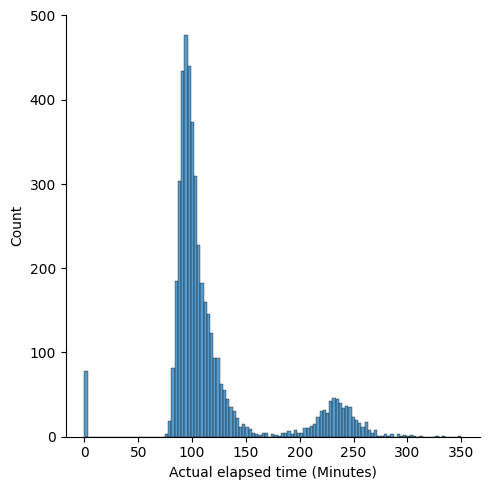

In [53]:
# Univariate Analysis
sns.displot(df_appended['Actual elapsed time (Minutes)'])


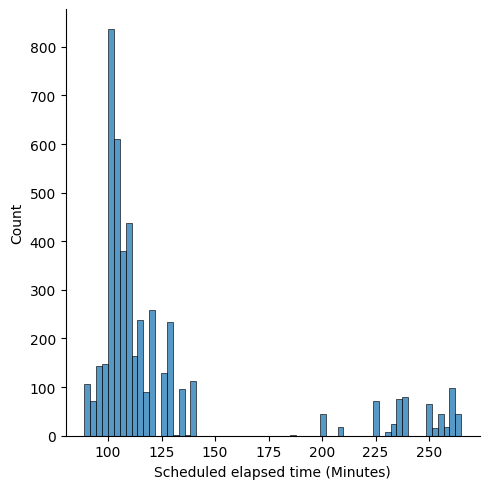

In [54]:
# Univariate Analysis
sns.displot(df_appended['Scheduled elapsed time (Minutes)'])

In [55]:
dataframe_new_columns = df_appended
dataframe_new_columns["Difference Between Actual and Elapsed Travel Time (Minutes)"] = (
    dataframe_new_columns["Actual elapsed time (Minutes)"] - dataframe_new_columns["Scheduled elapsed time (Minutes)"]
)
# dataframe_new_columns.drop(["Difference Between Actual and Elapsed Travel Time"], axis=1)
dataframe_new_columns

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Difference Between Actual and Elapsed Travel Time (Minutes)
0,WN,1/1/22,2644.0,N8578Q,ATL,5:55,6:02,115.0,97.0,7.0,6:13,11.0,0.0,0.0,0.0,0.0,0.0,-18.0
1,WN,1/1/22,3438.0,N903WN,ATL,12:50,12:46,110.0,98.0,-4.0,12:59,13.0,0.0,0.0,0.0,0.0,0.0,-12.0
2,WN,1/2/22,121.0,N494WN,MDW,18:45,21:14,135.0,175.0,149.0,21:25,11.0,17.0,0.0,40.0,0.0,132.0,40.0
3,WN,1/2/22,565.0,N8818Q,ATL,16:55,17:52,110.0,108.0,57.0,18:01,9.0,0.0,0.0,0.0,0.0,55.0,-2.0
4,WN,1/2/22,988.0,N7838A,DEN,12:35,12:44,240.0,304.0,9.0,12:52,8.0,9.0,0.0,64.0,0.0,0.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659,UA,12/30/22,1643.0,N852UA,DEN,8:00,8:00,262.0,232.0,0.0,8:11,11.0,0.0,0.0,0.0,0.0,0.0,-30.0
4660,UA,12/31/22,319.0,N24729,IAH,6:00,5:59,209.0,205.0,-1.0,6:17,18.0,0.0,0.0,0.0,0.0,0.0,-4.0
4661,UA,12/31/22,343.0,N464UA,ORD,6:40,6:50,140.0,119.0,10.0,7:10,20.0,0.0,0.0,0.0,0.0,0.0,-21.0
4662,UA,12/31/22,1183.0,N804UA,DEN,15:52,16:46,258.0,239.0,54.0,17:07,21.0,10.0,0.0,0.0,0.0,25.0,-19.0
